In [1]:
import numpy as np
import pandas as pd

In [249]:
df=pd.read_excel("approach1.xlsx")

In [250]:
df.head()

,date,export_quantity,export_value,import_quantity,import_value,cpi,usdvnd
0,1989-01-01,1029076,6654174,25313366,198743700,55.536320,1119.375
1,1989-02-01,1133290,7120081,16768414,125653662,55.765619,1119.375
2,1989-03-01,1045197,8105333,14456339,114708804,56.086638,5596.875
3,1989-04-01,771739,6390437,14354395,107661175,56.453518,5596.875
4,1989-05-01,1018818,7704786,15655169,118163556,56.774537,5596.875


In [252]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True) #set date as index
df.head()

,export_quantity,export_value,import_quantity,import_value,cpi,usdvnd
date,,,,,,
1989-01-01,1029076,6654174,25313366,198743700,55.536320,1119.375
1989-02-01,1133290,7120081,16768414,125653662,55.765619,1119.375
1989-03-01,1045197,8105333,14456339,114708804,56.086638,5596.875
1989-04-01,771739,6390437,14354395,107661175,56.453518,5596.875
1989-05-01,1018818,7704786,15655169,118163556,56.774537,5596.875


# Unvariate

In [336]:
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from chart_studio.plotly import plot_mpl
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR, SVAR, VARMAX
import seaborn as sns
from statsmodels.tsa.base.datetools import dates_from_str
from termcolor import colored

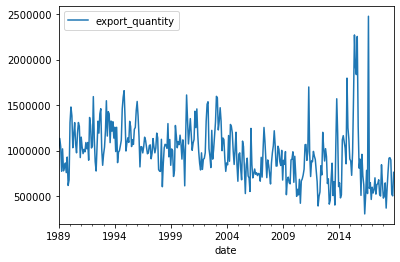

In [266]:
df[df.columns[0:1]].plot()

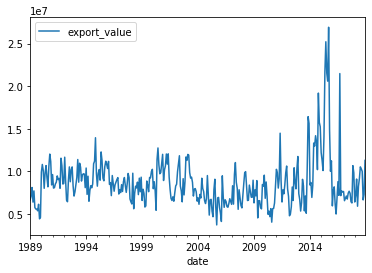

In [267]:
df[df.columns[1:2]].plot()

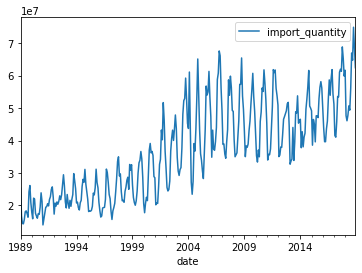

In [268]:
df[df.columns[2:3]].plot()

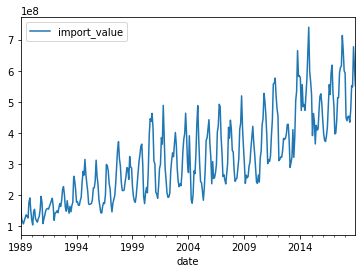

In [269]:
df[df.columns[3:4]].plot()

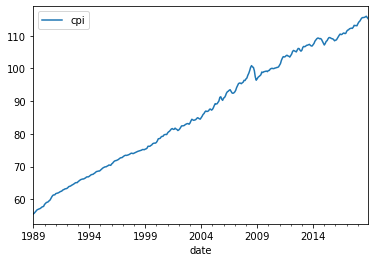

In [270]:
df[df.columns[4:5]].plot()

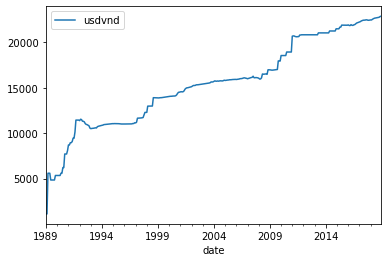

In [265]:
df[df.columns[5:6]].plot()

In [271]:
len(df)

360

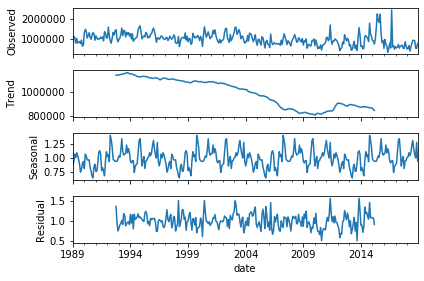

In [281]:
#freq = 365 : trend of year.
#freq = 30 : trend of month.
#freq = 7 : trend of week.

df1=df[df.columns[0]]
result = seasonal_decompose(df1, model='multiplicative',freq=90)
result.plot()
plt.show()

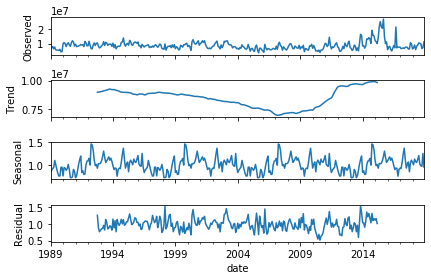

In [282]:
df1=df[df.columns[1]]
result = seasonal_decompose(df1, model='multiplicative',freq=90)
result.plot()
plt.show()

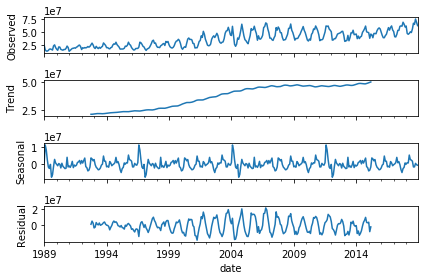

In [284]:
df1=df[df.columns[2]]
result = seasonal_decompose(df1, model='additive',freq=90)
result.plot()
plt.show()

In [296]:
def tsplot(y, title, lags=None, figsize=(20, 6)):
    fig = plt.figure(figsize=figsize)
    layout = (1, 3)
    ts_ax = plt.subplot2grid(layout, (0, 0))
    #hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax = plt.subplot2grid(layout, (0, 1))
    pacf_ax = plt.subplot2grid(layout, (0, 2))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title, fontsize=12, fontweight='bold')
    #y.plot(ax=hist_ax, kind='hist', bins=25)
    #hist_ax.set_title('Histogram')
    sm.tsa.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    sm.tsa.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    sns.despine()
    plt.tight_layout()
    plt.show()
    return ts_ax, acf_ax, pacf_ax

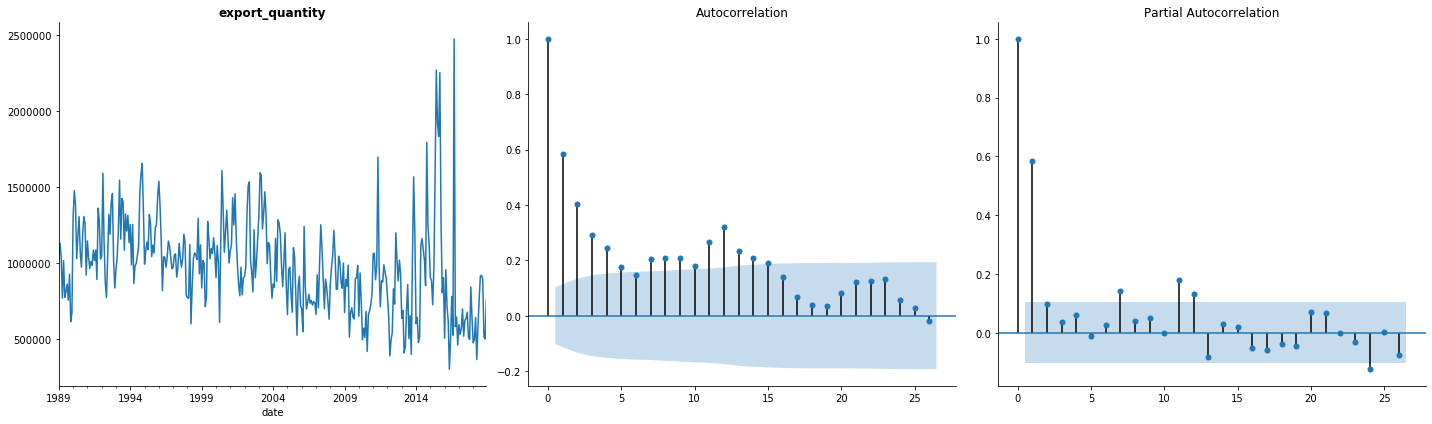

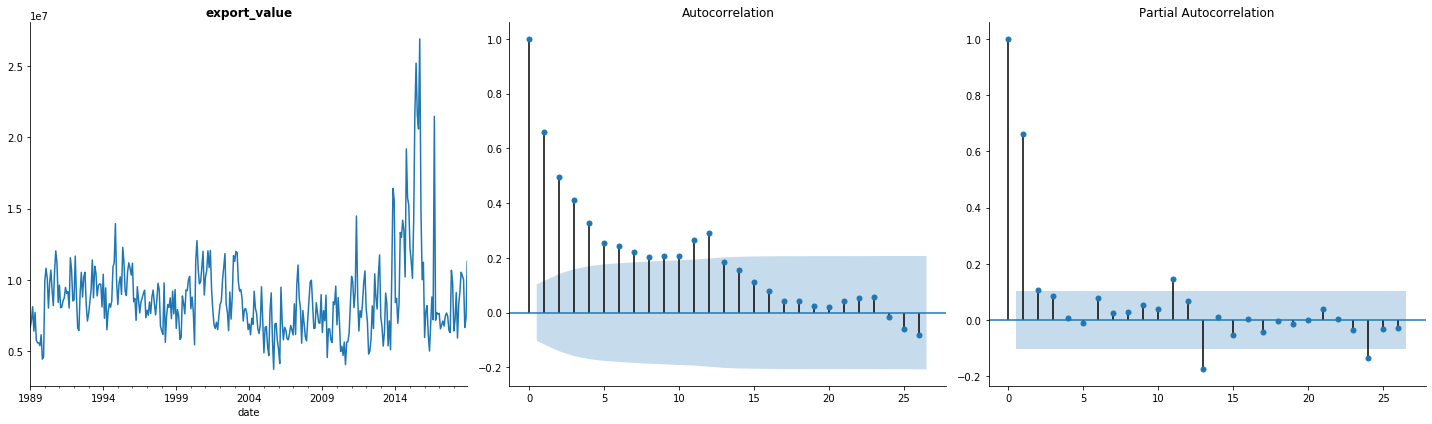

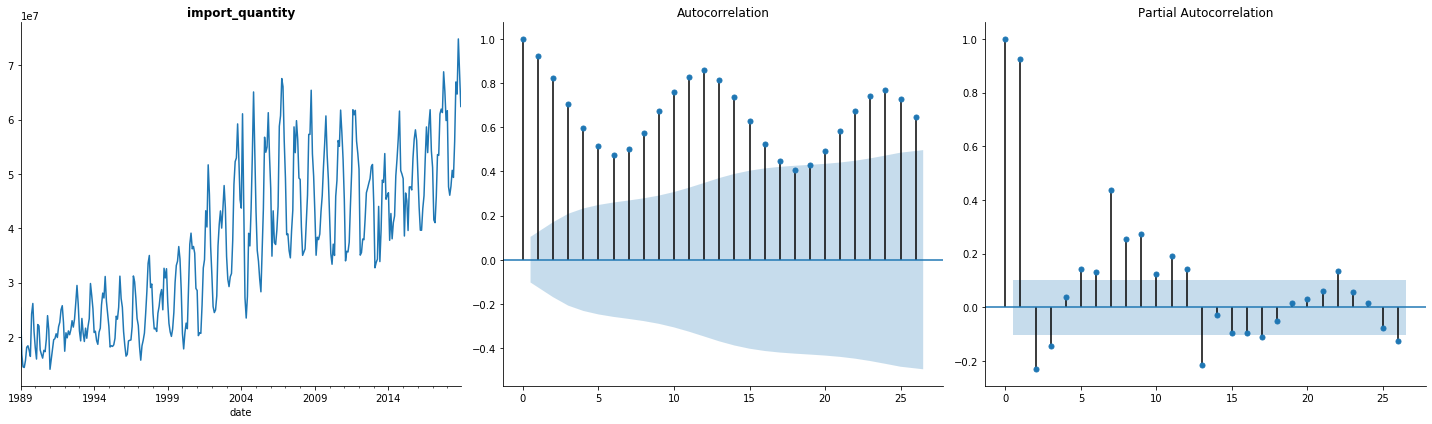

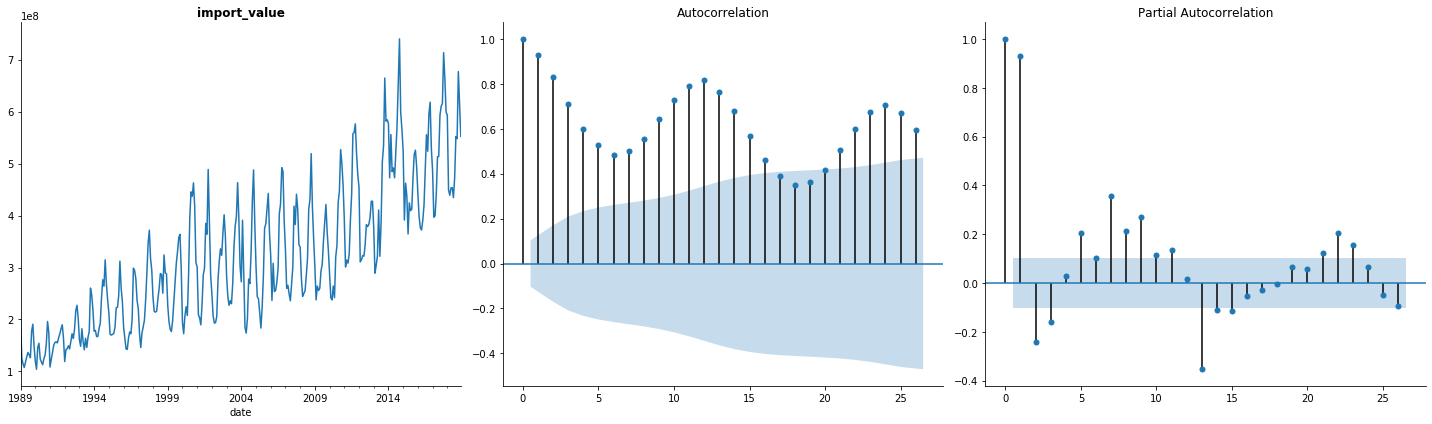

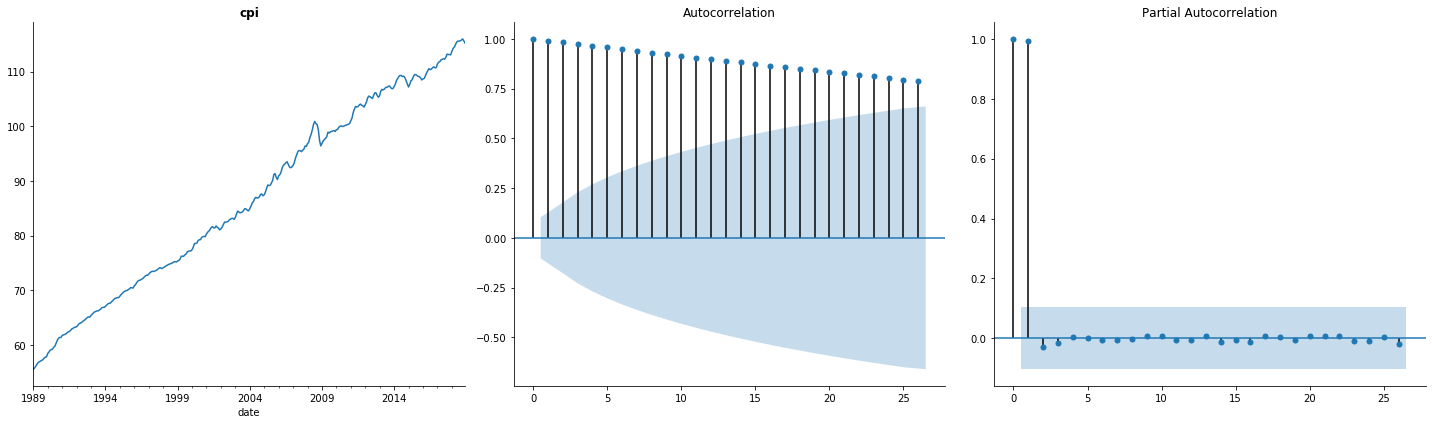

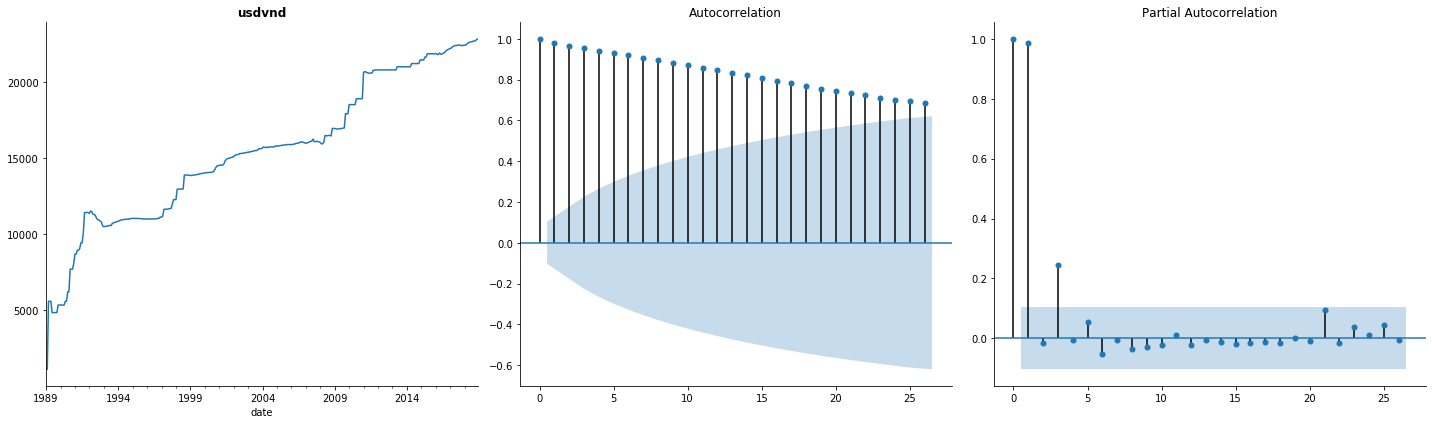

In [297]:
data=df
for name in data.columns:
    tsplot(data[name],name)

In [300]:
def test_stationarity(timeseries):
    ''' 
    #Determing rolling statistics
    rolmean = timeseries.rolling(3).mean()
    rolstd = timeseries.rolling(3).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    ''' 
    #perform dickey fuller test  
    #print("Results of dickey fuller test")
    #adft = adfuller(timeseries['Price'],autolag='AIC')
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    #output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    #for key,values in adft[4].items():
    #    output['critical value (%s)'%key] =  values
    #print(output)
    p_value=adft[1]
    return p_value
    #print(p_value)

In [301]:
for name in data.columns:
    #name='price0'
    print(name)
    df=data[name]
    p_value=test_stationarity(df)
    print("p-value: ",p_value)
    if (p_value<0.05):
        print(colored(name +" is Stationary",'green') )
    else:
        print(colored(name +" is not Stationary",'red') )

export_quantity
p-value:  0.08937399479119951
export_quantity is not Stationary
export_value
p-value:  0.010233266281716133
export_value is Stationary
import_quantity
p-value:  0.9287135292304431
import_quantity is not Stationary
import_value
p-value:  0.6153132348285228
import_value is not Stationary
cpi
p-value:  0.8762961241907575
cpi is not Stationary
usdvnd
p-value:  0.32688483452228645
usdvnd is not Stationary


In [302]:
# first difference
data_log_diff=np.log(data).diff().dropna()
# second difference
#data_log_diff=data_log_diff.diff().dropna()

In [303]:
for name in data.columns:
    #name='price0'
    print(name)
    df=data_log_diff[name]
    p_value=test_stationarity(df)
    print("p-value: ",p_value)
    if (p_value<0.05):
        print(colored(name +" is Stationary",'green') )
    else:
        print(colored(name +" is not Stationary",'red') )

export_quantity
p-value:  5.296037640075603e-19
export_quantity is Stationary
export_value
p-value:  1.9477970446910493e-11
export_value is Stationary
import_quantity
p-value:  3.904441084308834e-19
import_quantity is Stationary
import_value
p-value:  4.978102474204444e-07
import_value is Stationary
cpi
p-value:  0.00012032878388179977
cpi is Stationary
usdvnd
p-value:  3.480691691909877e-07
usdvnd is Stationary


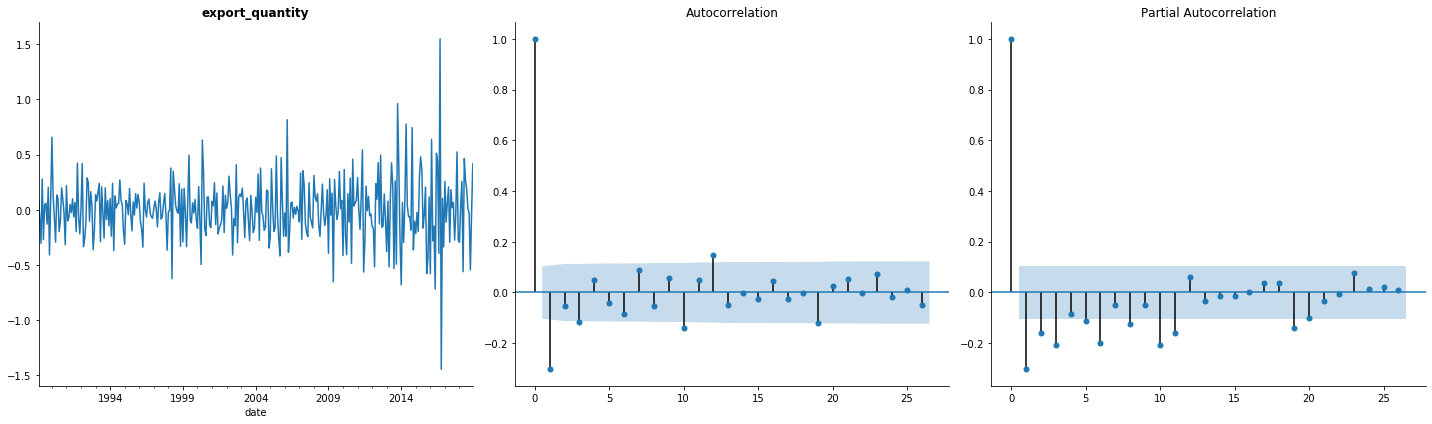

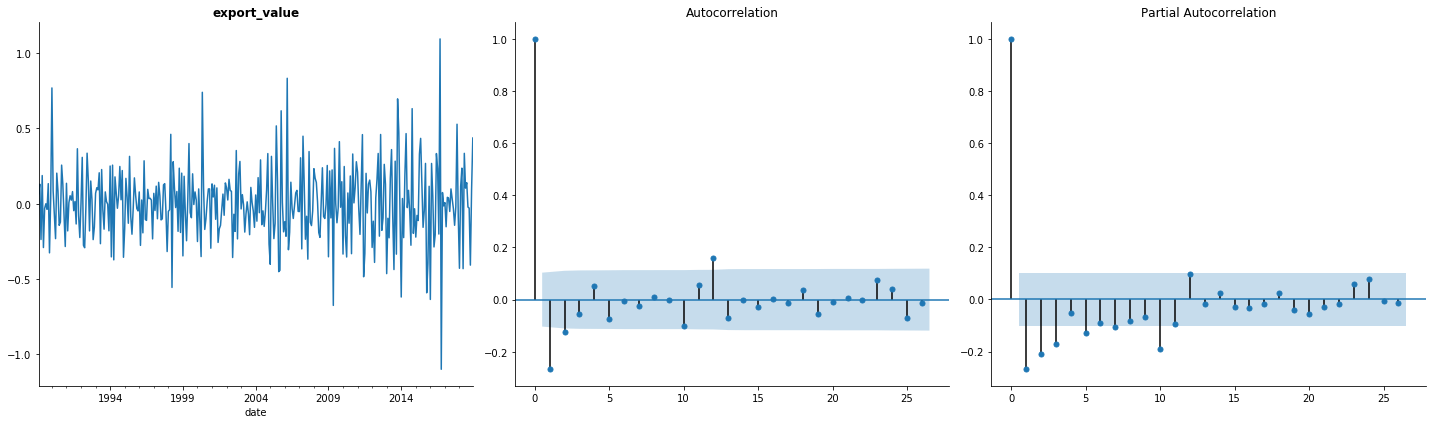

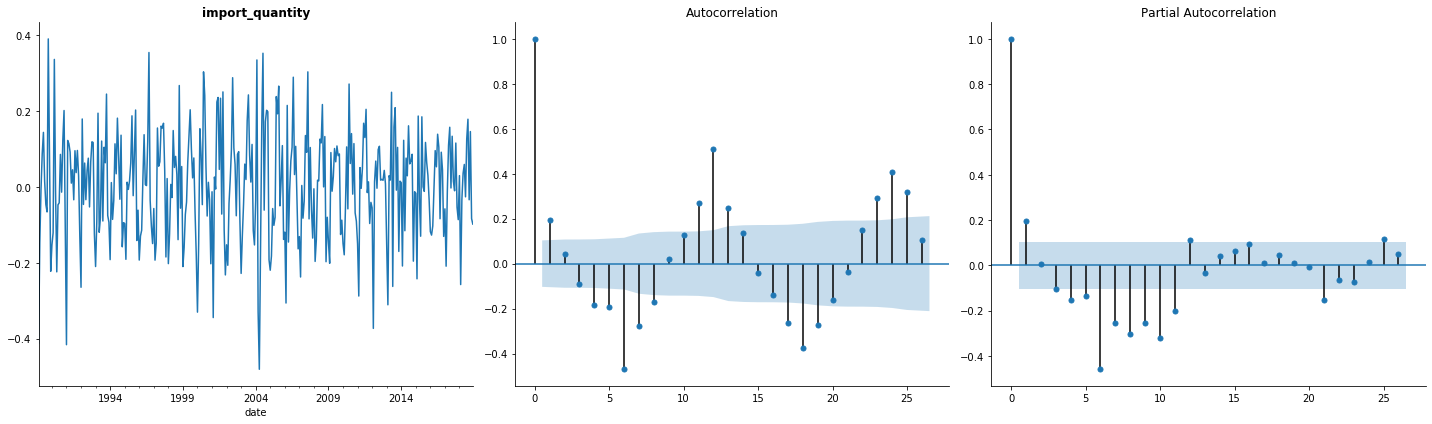

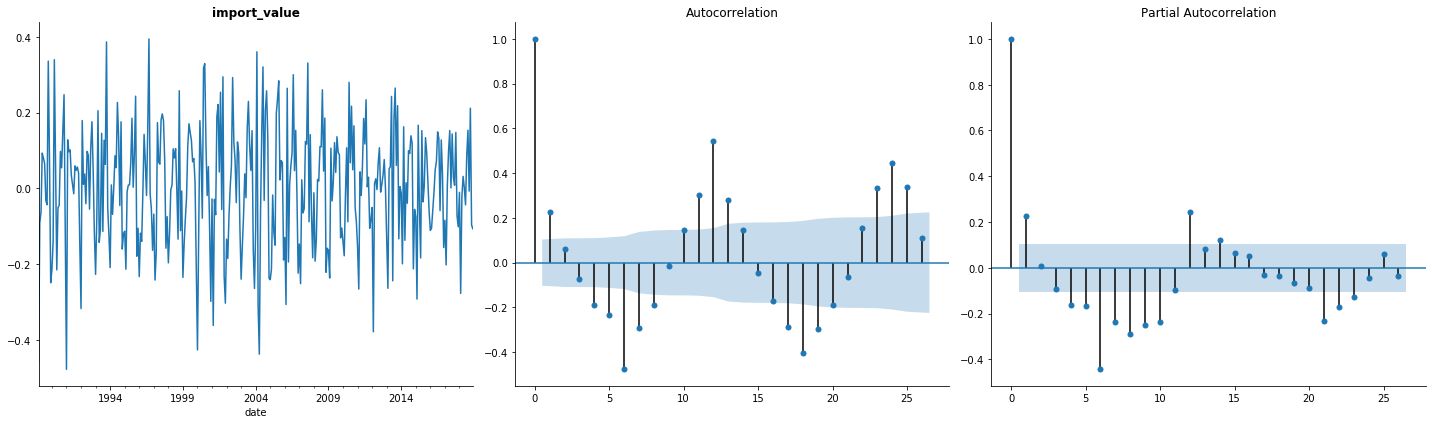

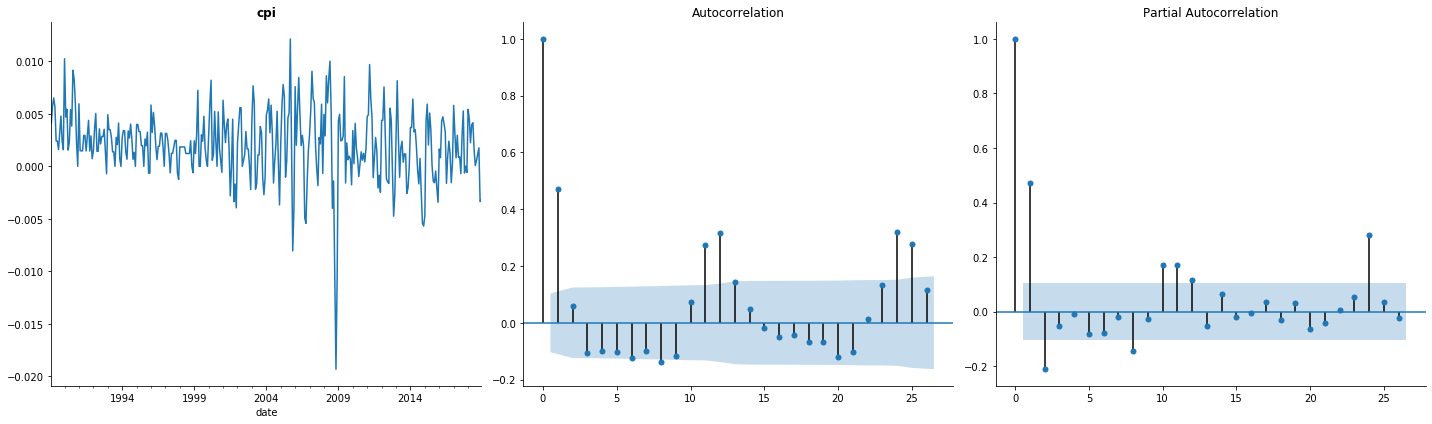

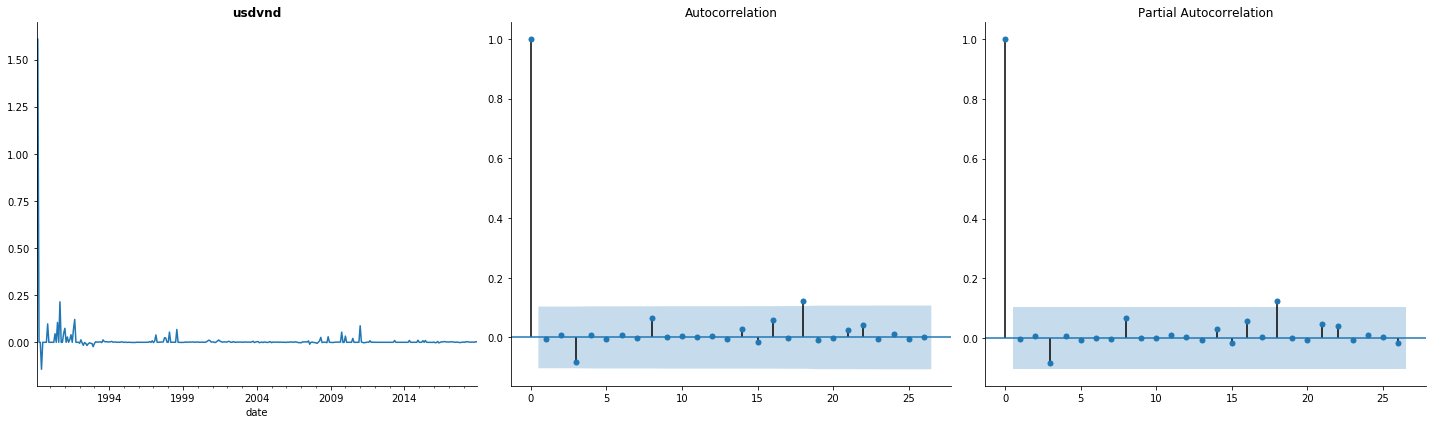

In [304]:
for name in data.columns:
    tsplot(data_log_diff[name],name)

In [356]:
names=data_log_diff.columns
train=data_log_diff.iloc[:300,]
test=data_log_diff.iloc[300:,]

In [357]:
train.shape, test.shape

((300, 6), (59, 6))

In [367]:
data.columns

Index(['export_quantity', 'export_value', 'import_quantity', 'import_value',
       'cpi', 'usdvnd'],
      dtype='object')

In [368]:
eq=data['export_quantity']
ev=data['export_value']
iq=data['import_quantity']
iv=data['import_value']
cpi=data['cpi']
uv=data['usdvnd']

# AUTO ARIMA

In [420]:
#seasonal_order(sp,sd,sq,s) parameters
#1 for yearly
#4 for quarterly
#12 for monthly
#52 for weekly
#365 for daily

In [415]:
train1=train['export_quantity']
test1=test['export_quantity']

In [416]:
model= SARIMAX(train1,order=(1, 1, 2), seasonal_order=(0, 1, 1, 12))

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [417]:
results = model.fit()
print(results.summary())

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                    export_quantity   No. Observations:                  300
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 12)   Log Likelihood                  21.528
Date:                            Fri, 15 May 2020   AIC                            -33.055
Time:                                    20:38:48   BIC                            -14.758
Sample:                                02-01-1989   HQIC                           -25.722
                                     - 01-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4944      0.059      8.377      0.000       0.379       0.610
ma.L1         -1.9686      0.030   

In [ ]:
#train_test_split
#tr_start,tr_end = '2014-01-01','2017-09-30'
#te_start,te_end = '2017-10-01','2017-12-31'
#tra = buf['sales'][tr_start:tr_end].dropna()
#tes = buf['sales'][te_start:te_end].dropna()

In [424]:
train_start=train1.index[0]
train_end=train1.index[-1]
test_start=test1.index[0]
test_end=test1.index[-1]

In [442]:
pred = results.predict(test_start,test_end)


In [443]:
from sklearn.metrics import mean_squared_error
print('ARIMA model MSE:{}'.format(mean_squared_error(test['export_quantity'],pred)))

ARIMA model MSE:0.20113401543820938


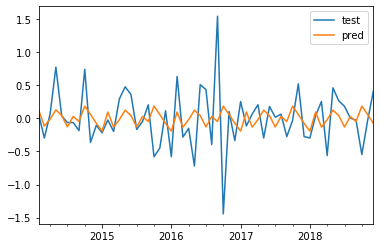

In [444]:
pd.DataFrame({'test':test['export_quantity'],'pred':pred}).plot()
plt.show()


# SARIMA model

In [437]:
#1 for yearly
#4 for quarterly
#12 for monthly
#52 for weekly
#365 for daily
sarima = SARIMAX(train1,order=(7,1,7),seasonal_order=(7,1,7,1),enforce_stationarity=False, 
                 enforce_invertibility=False).fit()
sarima.summary()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                   export_quantity   No. Observations:                  300
Model:             SARIMAX(7, 1, 7)x(7, 1, 7, 1)   Log Likelihood                  28.641
Date:                           Fri, 15 May 2020   AIC                              0.718
Time:                                   20:50:45   BIC                            106.436
Sample:                               02-01-1989   HQIC                            43.107
                                    - 01-01-2014                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9007      0.507     -3.746      0.000      -2.895      -0.906
ar.L2         -2.4830      1.033     -2.404      0.016      -4.507      -0.459
ar.L3         -2.3924      1.439     -1.662      0.097      -5.214       0.429
ar.L4         -1.6108      1.499     -1.075      0.282      -4.548       1.327
ar.L5         -0.8315      0.993     -0.838      0.402      -2.777       1.114
ar.L6         -0.4433      0.530     -0.837      0.403      -1.481       0.595
ar.L7         -0.1984      0.168     -1.180      0.238      -0.528       0.131
ma.L1          0.6482      1.063      0.610      0.542      -1.435       2.731
ma.L2          0.5414      0.953      0.568      0.570      -1.327       2.409
ma.L3         -0.4025      1.115     -0.361      0.718      -2.588       1.783
ma.L4         -0.7326      0.975     -0.752      0.452      -2.643       1.178
ma.L5         -0.7122      0.881     -0.808      0.419      -2.439       1.015
ma.L6         -0.3044      0.619     -0.492      0.623      -1.518       0.909
ma.L7         -0.0452      0.340     -0.133      0.894      -0.711       0.621
ar.S.L1       -1.7425      1.961     -0.888      0.374      -5.586       2.101
ar.S.L2       -2.6550      3.230     -0.822      0.411      -8.986       3.676
ar.S.L3       -2.3895      4.780     -0.500      0.617     -11.757       6.978
ar.S.L4       -1.7372      4.347     -0.400      0.689     -10.257       6.782
ar.S.L5       -0.7408      2.971     -0.249      0.803      -6.564       5.082
ar.S.L6       -0.0973      1.413     -0.069      0.945      -2.866       2.671
ar.S.L7        0.0042      0.113      0.038      0.970      -0.216       0.225
ma.S.L1        0.6482      1.063      0.610      0.542      -1.435       2.731
ma.S.L2        0.5414      0.953      0.568      0.570      -1.327       2.409
ma.S.L3       -0.4025      1.115     -0.361      0.718      -2.588       1.783
ma.S.L4       -0.7326      0.975     -0.752      0.452      -2.643       1.178
ma.S.L5       -0.7122      0.881     -0.808      0.419      -2.440       1.015
ma.S.L6       -0.3044      0.619     -0.492      0.623      -1.517       0.909
ma.S.L7       -0.0452      0.340     -0.133      0.894      -0.711       0.621
sigma2         0.0440      0.040      1.106      0.269      -0.034       0.122
===================================================================================
Ljung-Box (Q):                       38.18   Jarque-Bera (JB):                 3.17
Prob(Q):                              0.55   Prob(JB):                         0.20
Heteroskedasticity (H):               2.54   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covarianc

In [461]:
pred = sarima.predict(test_start,test_end)
print('SARIMA model MSE:{}'.format(mean_squared_error(test1,pred)))

SARIMA model MSE:0.1935618750663894


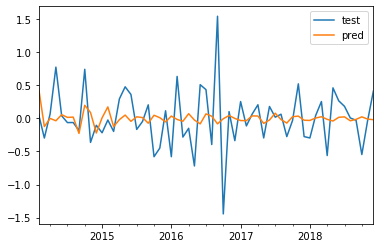

In [447]:
pd.DataFrame({'test':test1,'pred':pred}).plot();
plt.show()

# ARIMAX model

In [465]:
#exog=data['cpi']
exog_train=train['cpi']
exog_test=pd.DataFrame(test['cpi'])

In [466]:
arimax = SARIMAX(train1,
                 order=(7,1,7),
                 seasonal_order=(0,0,0,0),
                 exog = exog_train,
                 enforce_stationarity=False, enforce_invertibility=False).fit()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [467]:
pred = arimax.predict(test_start,test_end,exog = exog_test)
print('ARIMAX model MSE:{}'.format(mean_squared_error(test1,pred)))

ARIMAX model MSE:0.18942722859253794


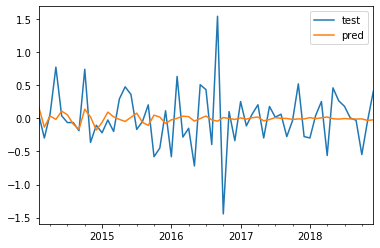

In [468]:
pd.DataFrame({'test':test1,'pred':pred}).plot();
plt.show()

# SARIMAX model

In [471]:
sarimax = sm.tsa.statespace.SARIMAX(train1,order=(7,1,7),seasonal_order=(1,0,5,1),exog = exog_train,
                                enforce_stationarity=False, enforce_invertibility=False).fit()
sarimax.summary()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                   export_quantity   No. Observations:                  300
Model:             SARIMAX(7, 1, 7)x(1, 0, 5, 1)   Log Likelihood                  48.754
Date:                           Fri, 15 May 2020   AIC                            -53.509
Time:                                   21:10:33   BIC                             26.923
Sample:                               02-01-1989   HQIC                           -21.269
                                    - 01-01-2014                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cpi            5.0486      2.235      2.259      0.024       0.669       9.429
ar.L1         -0.5458     26.457     -0.021      0.984     -52.400      51.309
ar.L2         -1.3816      4.899     -0.282      0.778     -10.984       8.221
ar.L3         -0.8813     35.096     -0.025      0.980     -69.668      67.906
ar.L4         -0.8236     11.084     -0.074      0.941     -22.548      20.900
ar.L5         -0.4569     18.255     -0.025      0.980     -36.236      35.322
ar.L6         -0.2724      6.136     -0.044      0.965     -12.299      11.754
ar.L7         -0.0604      5.173     -0.012      0.991     -10.199      10.079
ma.L1          0.0168      0.703      0.024      0.981      -1.361       1.395
ma.L2          0.3736      0.694      0.538      0.590      -0.987       1.734
ma.L3         -0.4993      0.748     -0.667      0.504      -1.965       0.967
ma.L4         -0.0137      0.638     -0.022      0.983      -1.264       1.236
ma.L5         -0.4178      0.609     -0.686      0.493      -1.612       0.776
ma.L6         -0.0950      0.399     -0.238      0.812      -0.876       0.686
ma.L7         -0.3619      0.356     -1.018      0.309      -1.059       0.335
ar.S.L1       -0.3890     26.313     -0.015      0.988     -51.961      51.183
ma.S.L1       -0.6416      1.467     -0.438      0.662      -3.516       2.233
ma.S.L2        0.0813      1.304      0.062      0.950      -2.474       2.636
ma.S.L3       -0.0036      1.012     -0.004      0.997      -1.987       1.980
ma.S.L4       -0.5232      0.744     -0.704      0.482      -1.981       0.934
ma.S.L5       -0.0089      1.009     -0.009      0.993      -1.986       1.968
sigma2         0.0374      0.020      1.917      0.055      -0.001       0.076
===================================================================================
Ljung-Box (Q):                       24.35   Jarque-Bera (JB):                 7.82
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.89   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

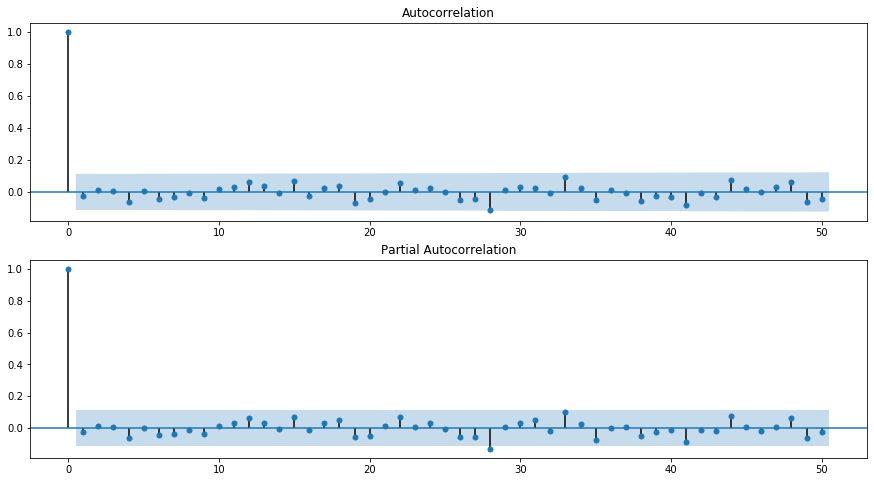

In [472]:
res = sarimax.resid
fig,ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [473]:
pred = sarimax.predict(test_start,test_end,exog = exog_test)
print('SARIMAX model MSE:{}'.format(mean_squared_error(test1,pred)))

SARIMAX model MSE:0.1913987052710855


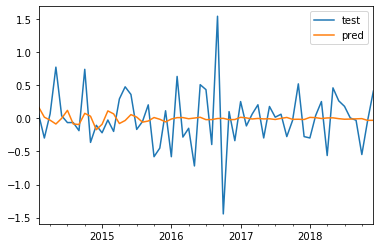

In [474]:
pd.DataFrame({'test':test1,'pred':pred}).plot();
plt.show()

# VARMAX model

In [475]:
from statsmodels.tsa.api import VAR, SVAR, VARMAX

In [476]:
train.shape

(300, 6)

In [477]:
test.shape

(59, 6)

In [479]:
train.columns[:4]

Index(['export_quantity', 'export_value', 'import_quantity', 'import_value'], dtype='object')

In [482]:
endog_train=train[train.columns[:4]]
exog_train=train[train.columns[4:]]

In [481]:
endog.shape, exog.shape

((300, 4), (300, 2))

In [483]:
model=VARMAX(endog=endog_train,exog=exog_train,order=(2,1))

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [484]:
model_fit=model.fit()

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [485]:
model_fit.summary()

Dep. Variable:,"['export_quantity', 'export_value', 'import_quantity', 'import_value']",No. Observations:,300
Model:,"VARMAX(2,1)",Log Likelihood,1103.678
,+ intercept,AIC,-2067.356
Date:,"Fri, 15 May 2020",BIC,-1808.091
Time:,22:16:18,HQIC,-1963.598
Sample:,02-01-1989,,
,- 01-01-2014,,
Covariance Type:,opg,,
Ljung-Box (Q):,"59.79, 64.02, 386.15, 84.27",Jarque-Bera (JB):,"9.55, 5.62, 1.10, 14.15"
Prob(Q):,"0.02, 0.01, 0.00, 0.00",Prob(JB):,"0.01, 0.06, 0.58, 0.00"
Heteroskedasticity (H):,"2.40, 1.14, 0.93, 0.70",Skew:,"-0.01, 0.29, -0.13, -0.14"


In [487]:
endog_test=test[test.columns[:4]]
exog_test=test[test.columns[4:]]

In [488]:
pred=model_fit.predict(test_start,test_end,exog=exog_test)

C:\Users\tvlon\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


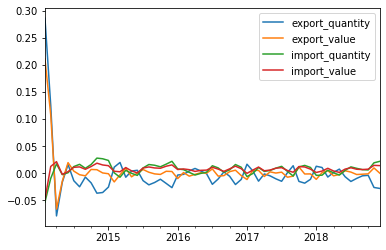

In [489]:
pred.plot()

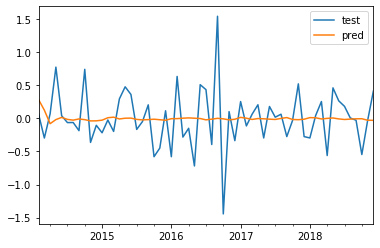

In [491]:
name=names[0]
pd.DataFrame({'test': test[name],'pred': pred[name]}).plot()

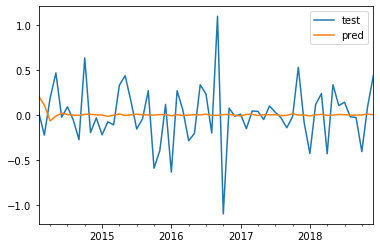

In [494]:
name=names[1]
pd.DataFrame({'test': test[name],'pred': pred[name]}).plot()

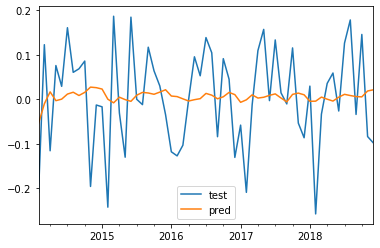

In [495]:
name=names[2]
pd.DataFrame({'test': test[name],'pred': pred[name]}).plot()

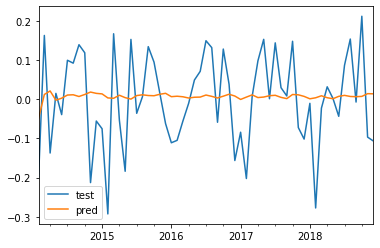

In [496]:
name=names[3]
pd.DataFrame({'test': test[name],'pred': pred[name]}).plot()

In [507]:
pred=model_fit.predict(pd.to_datetime("2014-2-01"),pd.to_datetime("2020-2-01"))

ValueError: Out-of-sample forecasting in a model with a regression component requires additional exogenous values via the `exog` argument.

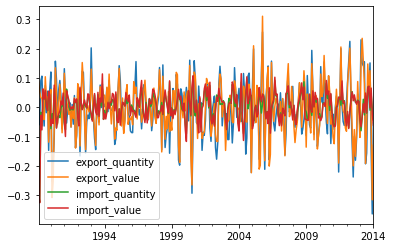

In [503]:
pred.plot()

In [504]:
test_start

Timestamp('2014-02-01 00:00:00')

In [506]:
pd.to_datetime("2014-2-01")

Timestamp('2014-02-01 00:00:00')